#### Problem definition and purpose: 
This data set consists of world happiness reports, which were first published in 2012, ranking 155 countries according to their happiness levels.

Six factors – economic production, social support, life expectancy, freedom, freedom from corruption and generosity – are taken into account to determine happiness levels. The aim is to seek answers to questions such as the following in order to contribute to the creation of happier societies in today's world.

Which countries or regions rank highest in overall happiness and in each of the six factors that contribute to happiness?

How did country rankings or scores change between the 2015-2016 and 2016-2017 reports?

Have any countries experienced a significant increase or decrease in happiness?

In [297]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt                 

In [298]:
data_15 = pd.read_csv('2015.csv')
data_16 = pd.read_csv('2016.csv')
data_17 = pd.read_csv('2017.csv')



In [299]:
data_17.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


In [300]:
data_15.head(1)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [301]:
data_16.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


we organize the data

In [302]:

data_17.columns = data_17.columns.str.replace('.', ' ',regex=False)
data_17 = data_17.rename(columns={'Trust  Government Corruption ': 'Trust (Government Corruption)'})
data_15=data_15.drop(['Standard Error'],axis=1)
data_16=data_16.drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1)
data_17=data_17.drop(['Whisker high','Whisker low'],axis=1)
data_17.head(1)


,Country,Happiness Rank,Happiness Score,Economy GDP per Capita,Family,Health Life Expectancy,Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


##### Which countries or regions rank highest in overall happiness and in each of the six factors that contribute to happiness?


In [303]:
max_values=data_15.drop(['Country','Happiness Score','Region','Happiness Rank','Dystopia Residual'],axis= 1).max()

for feature, max_value in max_values.items():
     country_region = data_15[data_15[feature] == max_value]
     country = country_region['Country'].values[0]
     region = country_region['Region'].values[0]
     happiness_score=country_region['Happiness Score'].values[0]
     rank=country_region['Happiness Rank'].values[0]
     print()
     print(country,' is the country with the highest  ',feature, ' value : ',max_value)
     print('(',region,')-(Happiness Score :',happiness_score,'Rank: ',rank,')')


Qatar  is the country with the highest   Economy (GDP per Capita)  value :  1.69042
( Middle East and Northern Africa )-(Happiness Score : 6.611 Rank:  28 )

Iceland  is the country with the highest   Family  value :  1.40223
( Western Europe )-(Happiness Score : 7.561 Rank:  2 )

Singapore  is the country with the highest   Health (Life Expectancy)  value :  1.02525
( Southeastern Asia )-(Happiness Score : 6.798 Rank:  24 )

Norway  is the country with the highest   Freedom  value :  0.66973
( Western Europe )-(Happiness Score : 7.522 Rank:  4 )

Rwanda  is the country with the highest   Trust (Government Corruption)  value :  0.55191
( Sub-Saharan Africa )-(Happiness Score : 3.465 Rank:  154 )

Myanmar  is the country with the highest   Generosity  value :  0.79588
( Southeastern Asia )-(Happiness Score : 4.307 Rank:  129 )


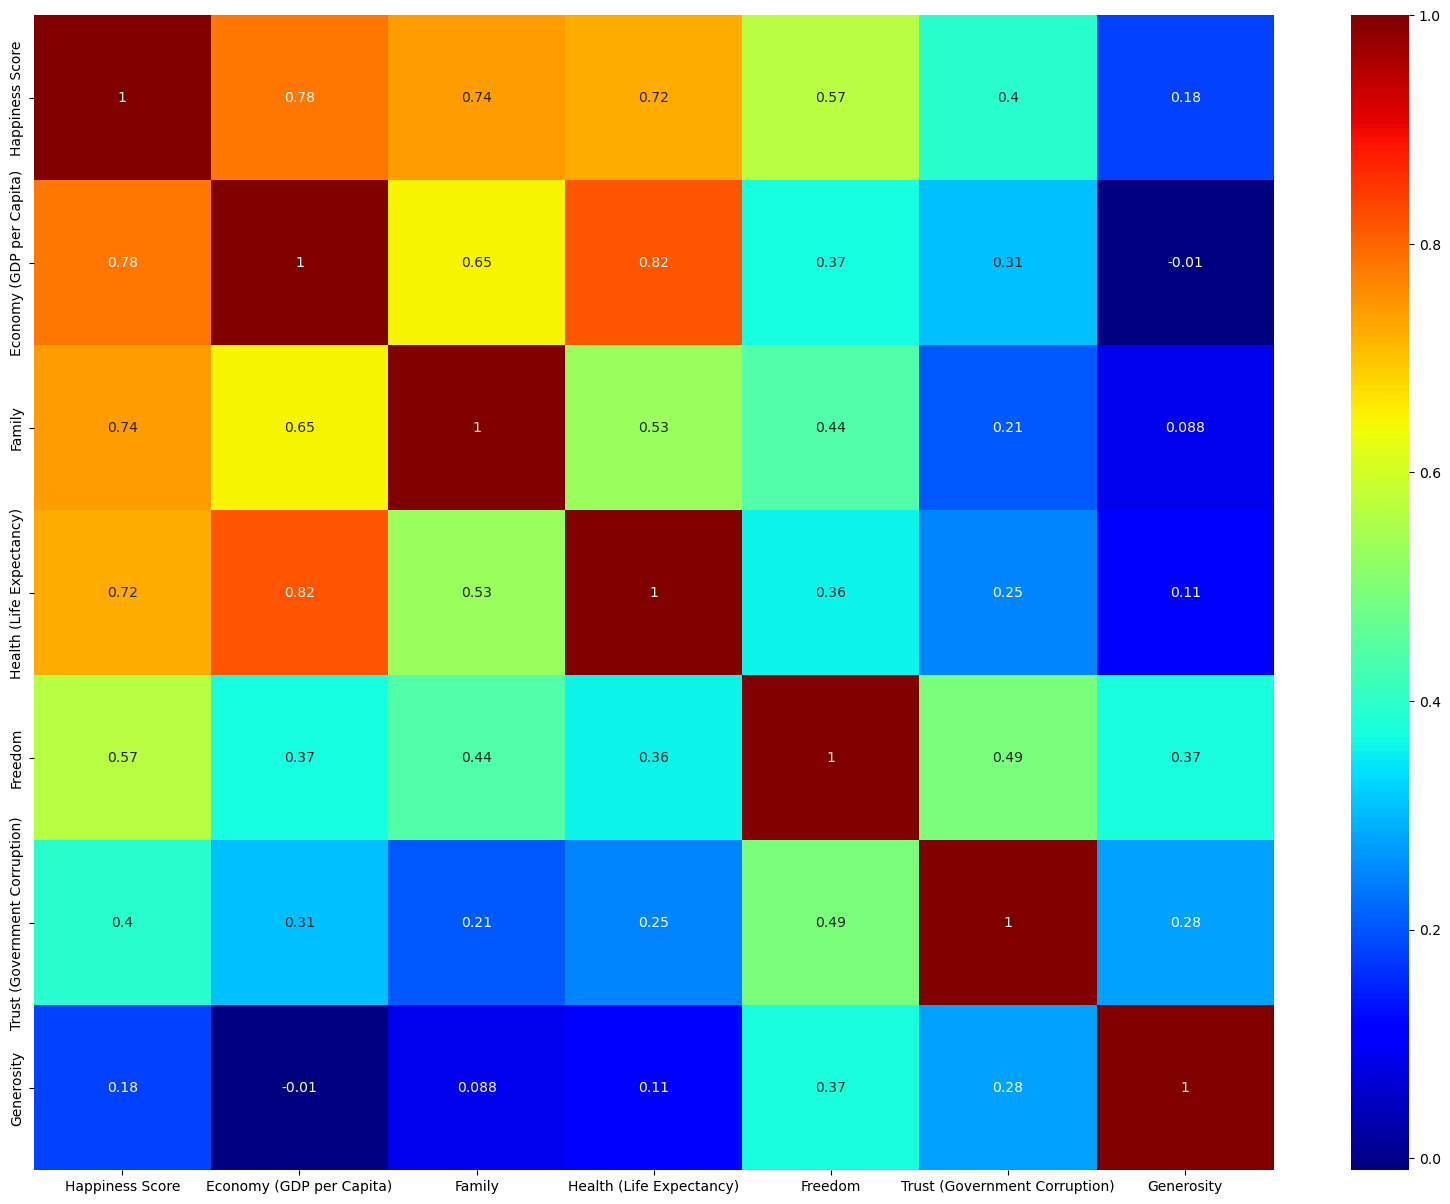

In [304]:
corr_matrix = data_15.drop(['Happiness Rank','Dystopia Residual'],axis= 1)
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(corr_matrix.corr(numeric_only=True), cmap = 'jet', annot = True)

plt.show()


#### How did country rankings or scores change between the 2015-2016 and 2016-2017 reports?


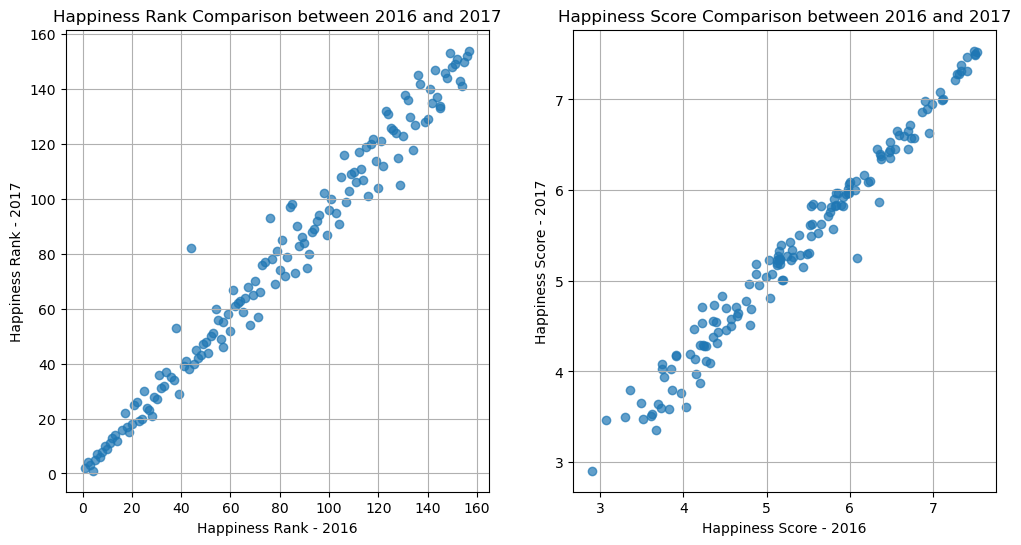

In [305]:
df16=data_16[['Country','Happiness Rank','Happiness Score']]
df17=data_17[['Country','Happiness Rank','Happiness Score']]
merged_data=pd.merge(df16,df17, on='Country',suffixes=('_2016', '_2017'))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(merged_data["Happiness Rank_2016"], merged_data["Happiness Rank_2017"], alpha=0.7)
plt.xlabel("Happiness Rank - 2016")
plt.ylabel("Happiness Rank - 2017")
plt.title("Happiness Rank Comparison between 2016 and 2017")
plt.grid(True)



plt.subplot(1, 2, 2)
plt.scatter(merged_data["Happiness Score_2016"], merged_data["Happiness Score_2017"], alpha=0.7)
plt.xlabel("Happiness Score - 2016")
plt.ylabel("Happiness Score - 2017")
plt.title("Happiness Score Comparison between 2016 and 2017")
plt.grid(True)


plt.show()

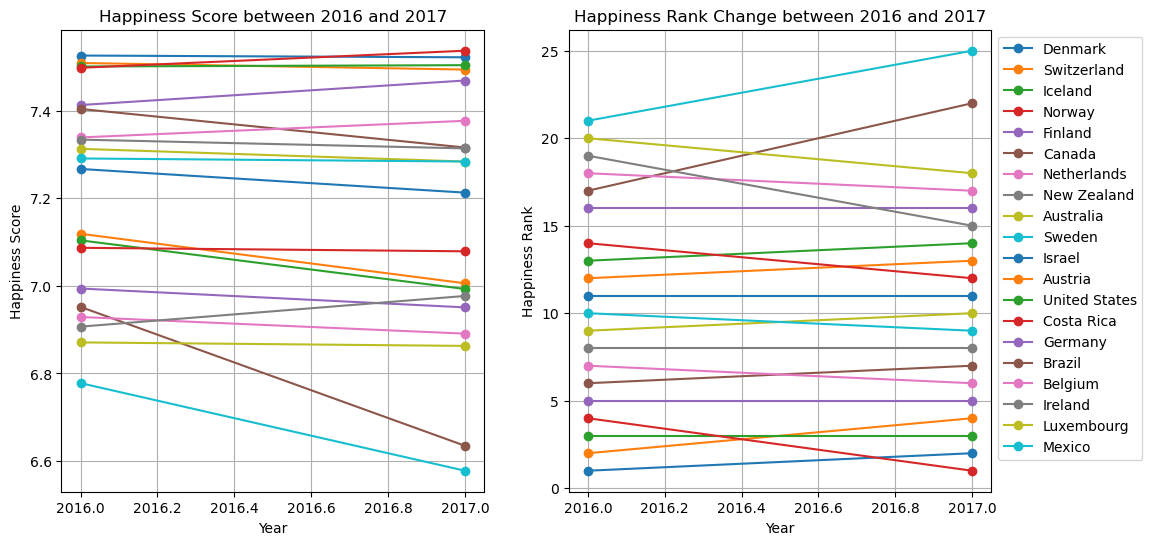

In [306]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
line_chart=merged_data.head(20)
for country in line_chart['Country']:
    country_data = line_chart[line_chart['Country'] == country]
    plt.plot([2016, 2017], country_data[['Happiness Score_2016', 'Happiness Score_2017']].values.flatten(), marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score between 2016 and 2017')

plt.grid(True)

plt.subplot(1, 2, 2)

for country in line_chart['Country']:
    country_data = line_chart[line_chart['Country'] == country]
    plt.plot([2016, 2017], country_data[['Happiness Rank_2016', 'Happiness Rank_2017']].values.flatten(), marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Happiness Rank')
plt.title('Happiness Rank Change between 2016 and 2017')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

#### Have any countries experienced a significant increase or decrease in happiness?

In [307]:
merged_data.head()

,Country,Happiness Rank_2016,Happiness Score_2016,Happiness Rank_2017,Happiness Score_2017
0,Denmark,1,7.526,2,7.522
1,Switzerland,2,7.509,4,7.494
2,Iceland,3,7.501,3,7.504
3,Norway,4,7.498,1,7.537
4,Finland,5,7.413,5,7.469


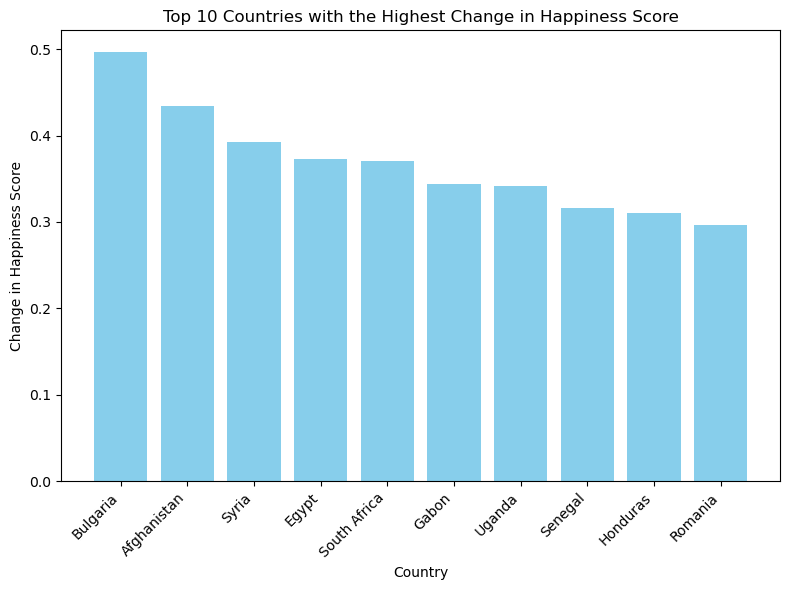

In [308]:
merged_data['Score Change']=merged_data['Happiness Score_2017'] - merged_data['Happiness Score_2016']
top_10_changes=merged_data.sort_values(by='Score Change',ascending=False).head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_changes['Country'], top_10_changes['Score Change'], color='skyblue')


plt.xlabel('Country')
plt.ylabel('Change in Happiness Score')
plt.title('Top 10 Countries with the Highest Change in Happiness Score')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()